In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [7]:
# Create the CSV file inside Jupyter so it exists in the same folder as the notebook
data_text = """Area,Bedrooms,Age,Price
2000,3,5,500000
1500,2,10,350000
2500,4,2,620000
1800,3,7,400000
2200,3,3,570000
1600,2,15,300000
2100,3,6,480000
2400,4,4,610000
1700,3,8,390000
2300,4,1,650000
"""

# Save to CSV
with open("house_prices.csv", "w") as file:
    file.write(data_text)

print("house_prices.csv created successfully!")


house_prices.csv created successfully!


In [8]:
import pandas as pd

data = pd.read_csv("house_prices.csv")
print(data.head())


   Area  Bedrooms  Age   Price
0  2000         3    5  500000
1  1500         2   10  350000
2  2500         4    2  620000
3  1800         3    7  400000
4  2200         3    3  570000


In [9]:
print("Shape of dataset:", data.shape)
print("\nColumn names:", data.columns)
print("\nSummary statistics:")
print(data.describe())
print("\nMissing values in each column:")
print(data.isnull().sum())


Shape of dataset: (10, 4)

Column names: Index(['Area', 'Bedrooms', 'Age', 'Price'], dtype='object')

Summary statistics:
              Area   Bedrooms        Age          Price
count    10.000000  10.000000  10.000000      10.000000
mean   2010.000000   3.100000   6.100000  487000.000000
std     347.850543   0.737865   4.175324  123472.894011
min    1500.000000   2.000000   1.000000  300000.000000
25%    1725.000000   3.000000   3.250000  392500.000000
50%    2050.000000   3.000000   5.500000  490000.000000
75%    2275.000000   3.750000   7.750000  600000.000000
max    2500.000000   4.000000  15.000000  650000.000000

Missing values in each column:
Area        0
Bedrooms    0
Age         0
Price       0
dtype: int64


In [10]:
X = data[["Area", "Bedrooms", "Age"]] 
y = data["Price"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [14]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print(comparison)
accuracy = model.score(X_test, y_test)
print("\nModel Accuracy (R² score):", round(accuracy * 100, 2), "%")
# Predict price for a new house (with column names)
new_house = pd.DataFrame([[2100, 3, 5]], columns=["Area", "Bedrooms", "Age"])
predicted_price = model.predict(new_house)
print("\nPredicted price for new house:", round(predicted_price[0], 2))


   Actual Price  Predicted Price
8        390000    397542.372881
1        350000    319679.849341

Model Accuracy (R² score): -22.02 %

Predicted price for new house: 514632.77


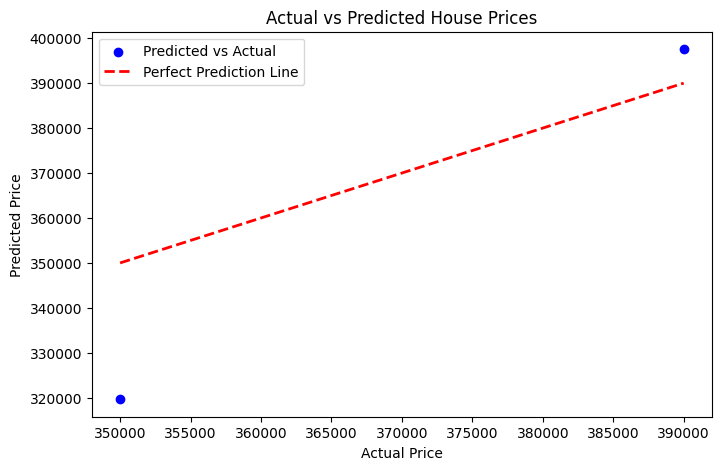

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


In [16]:
import random
random.seed(42)
areas = [random.randint(1000, 4000) for _ in range(100)]
bedrooms = [random.randint(1, 5) for _ in range(100)]
ages = [random.randint(0, 20) for _ in range(100)]
prices = [(a * 250) + (b * 50000) - (age * 2000) + random.randint(-20000, 20000)
          for a, b, age in zip(areas, bedrooms, ages)]

big_data = pd.DataFrame({
    "Area": areas,
    "Bedrooms": bedrooms,
    "Age": ages,
    "Price": prices
})
big_data.to_csv("house_prices_large.csv", index=False)

print("Large dataset created successfully!")
print(big_data.head())


Large dataset created successfully!
   Area  Bedrooms  Age    Price
0  3619         2    6  1010707
1  1456         3    9   511533
2  1102         1   12   285494
3  2126         2   20   592052
4  2003         1   11   512496


In [17]:
data = pd.read_csv("house_prices_large.csv")
X = data[["Area", "Bedrooms", "Age"]]
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Accuracy
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print("Model Accuracy (R² score):", round(accuracy * 100, 2), "%")


Model Accuracy (R² score): 99.72 %


In [18]:
comparison = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print(comparison.head(10))
new_house = pd.DataFrame([[2500, 4, 5]], columns=["Area", "Bedrooms", "Age"])
predicted_price = model.predict(new_house)
print("\nPredicted price for a 2500 sqft, 4-bedroom, 5-year-old house:",
      round(predicted_price[0], 2))


    Actual Price  Predicted Price
83       1177829     1.193368e+06
53        528622     5.237030e+05
70        691264     7.041460e+05
45        762396     7.449961e+05
44        583034     5.722973e+05
39        489910     4.911097e+05
22        597635     5.994206e+05
80        547622     5.350409e+05
10        565317     5.733143e+05
0        1010707     9.916220e+05

Predicted price for a 2500 sqft, 4-bedroom, 5-year-old house: 813184.31


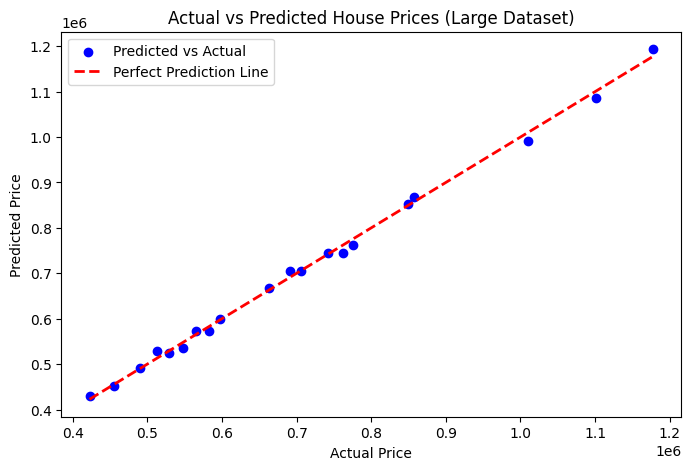

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Large Dataset)")
plt.legend()
plt.show()
